In [1]:
from oceans.datasets import woa_subset


bbox = [2.5, 357.5, -87.5, 87.5]
kw = dict(bbox=bbox, variable='temperature', clim_type='00',
          resolution='0.25', full=True)

cubes = woa_subset(**kw)
print(cubes)

0: sea_water_temperature / (degrees_celsius) (time: 1; depth: 102; latitude: 702; longitude: 1422)
1: sea_water_temperature / (1)         (time: 1; depth: 102; latitude: 702; longitude: 1422)
2: sea_water_temperature / (degrees_celsius) (time: 1; depth: 102; latitude: 702; longitude: 1422)
3: sea_water_temperature / (degrees_celsius) (time: 1; depth: 102; latitude: 702; longitude: 1422)
4: sea_water_temperature / (degrees_celsius) (time: 1; depth: 102; latitude: 702; longitude: 1422)
5: sea_water_temperature / (degrees_celsius) (time: 1; depth: 102; latitude: 702; longitude: 1422)
6: sea_water_temperature / (1)         (time: 1; depth: 102; latitude: 702; longitude: 1422)


/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1621: UserWarning: NetCDF variable 't_sd' contains unknown cell method 'standard'
  '{}'.format(method_words[0])))


In [2]:
[(k, c.var_name, c.long_name) for k, c in enumerate(cubes)]

[(0,
  u't_mn',
  u'Average of all unflagged interpolated values at each standard depth level for sea_water_temperature in each grid-square which contain at least one measurement.'),
 (1,
  u't_dd',
  u'The number of observations of sea_water_temperature in each grid-square at each standard depth level.'),
 (2,
  u't_sd',
  u'The standard deviation about the statistical mean of sea_water_temperature in each grid-square at each standard depth level.'),
 (3,
  u't_se',
  u'The standard error about the statistical mean of sea_water_temperature in each grid-square at each standard depth level.'),
 (4,
  u't_an',
  u'Objectively analyzed mean fields for sea_water_temperature at standard depth levels.'),
 (5,
  u't_oa',
  u'statistical mean value minus the objectively analyzed mean value for sea_water_temperature.'),
 (6,
  u't_gp',
  u'The number of grid-squares within the smallest radius of influence around each grid-square which contain a statistical mean for sea_water_temperature.')]

In [3]:
cube = cubes[4]

c = cube[0, 0, ...]  # Slice singleton time and first level.

lon = c.coord(axis='X')
lon.circular = True

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

import iris.plot as iplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from oceans.colormaps import cm


def make_map(cube, projection=ccrs.PlateCarree(), figsize=(12, 10),
             cmap=cm.avhrr):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=projection))
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    cs = iplt.pcolormesh(cube, cmap=cmap)
    ax.coastlines()
    if isinstance(projection, ccrs.PlateCarree) or isinstance(projection, ccrs.Mercator):
        gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1.5,
                          color='gray', alpha=0.5, linestyle='--')
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    cbar = dict(extend='both', shrink=0.5, pad=0.02,
                orientation='horizontal', fraction=0.1)
    cb = fig.colorbar(cs, **cbar)
    cb.ax.set_xlabel(r"$^{\circ}$ C")
    return fig, ax

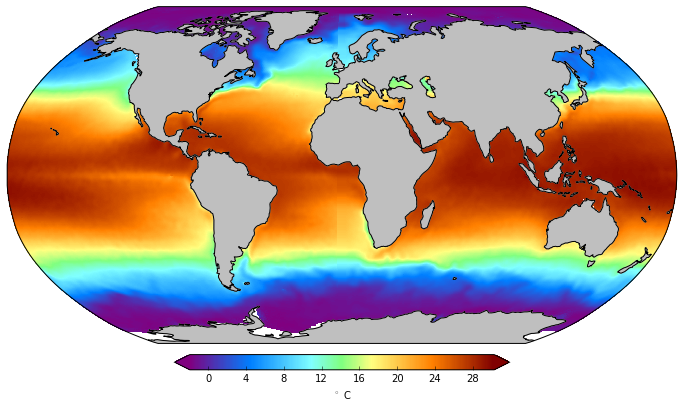

In [5]:
fig, ax = make_map(c, projection=ccrs.Robinson())

In [6]:
from oceans import woa_profile

kw = dict(variable='temperature', clim_type='00', resolution='1.00', full=False)
polar = woa_profile(-25.5, -70.5, **kw)
tempe = woa_profile(-25.5, -45.0, **kw)
equat = woa_profile(-25.5, 0, **kw)

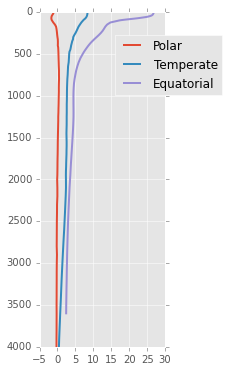

In [7]:
from matplotlib import style
import matplotlib.pyplot as plt


style.use('ggplot')

def plot_profile(ax, cube, label):
    z = cube.coord(axis='Z').points
    l = ax.plot(cube[0, :].data, z, label=label, linewidth=2)

fig, ax = plt.subplots(figsize=(2.25, 6))
plot_profile(ax, polar, label='Polar')
plot_profile(ax, tempe, label='Temperate')
plot_profile(ax, equat, label='Equatorial')
ax.legend(bbox_to_anchor=(1.5, .95))
ax.invert_yaxis()
_ = ax.set_ylim(4000, 0)

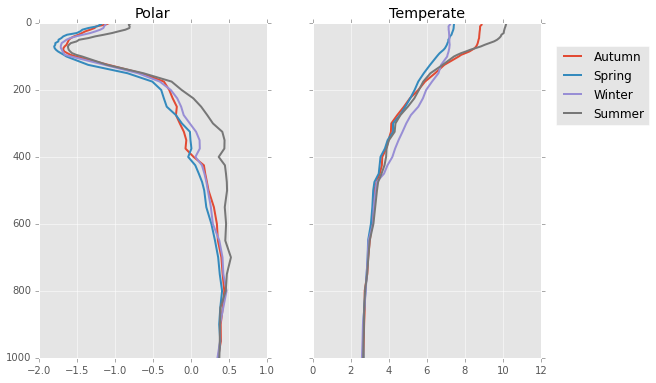

In [8]:
clim_types = dict(Summer=13, Autumn=14, Winter=15, Spring=16)  # South Hemisphere.


fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9, 6), sharey=True)

ax0.set_title('Polar')
for season, clim_type in clim_types.items():
    kw = dict(variable='temperature', clim_type=clim_type, resolution='1.00', full=False)
    polar = woa_profile(-25.5, -70.5, **kw)
    plot_profile(ax0, polar, label='{}'.format(season))

ax1.set_title('Temperate')
for season, clim_type in clim_types.items():
    kw = dict(variable='temperature', clim_type=clim_type, resolution='1.00', full=False)
    tempe = woa_profile(-25.5, -45.0, **kw)
    plot_profile(ax1, tempe, label='{}'.format(season))

ax1.legend(bbox_to_anchor=(1.5, .95))
ax1.invert_yaxis()
_ = ax1.set_ylim(1000, 0)